## Usage

The example below uses a modified version of the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic), which can be found in this GitRepo [here](../tests/data/titanic.csv). 

In [1]:
from advanced_value_counts.avc import AdvancedValueCounts
import pandas as pd

# read in the data file
df = pd.read_csv('../tests/data/titanic.csv', usecols=['CabinArea','Title'])
df.head()

,CabinArea,Title
0,NaN,Mr.
1,C,Mrs.
2,NaN,Miss.
3,C,Mrs.
4,NaN,Mr.


In [2]:
# create an instance of AdvancedValueCounts
avc = AdvancedValueCounts(df=df, column='Title')

# print the AdvancedValueCounts DataFrame
avc.avc_df

,ratio,count
Title,,
Mr.,0.580247,517
Miss.,0.204265,182
Mrs.,0.140292,125
Master.,0.044893,40
_na,0.007856,7
Rev.,0.006734,6
Major.,0.002245,2
Mlle.,0.002245,2
Col.,0.002245,2


Set `min_group_count` to 5 to group small groups into `'_other'` group

In [9]:
avc.min_group_count = 5
avc.avc_df

,ratio,count
Title,,
Mr.,0.580247,517
Miss.,0.204265,182
Mrs.,0.140292,125
Master.,0.044893,40
_other,0.015713,14
_na,0.007856,7
Rev.,0.006734,6


Parameters of the `AdvancedValueCounts` class to adjust for small groups for a single column: 

In [10]:
dropna: bool = False
min_group_count: int = 1 # does not effect NA or the '_other' group
min_group_ratio: float = 0 # does not effect NA or the '_other' group

It is also possible to use `column` in combination with parameter `groupy_col: str = None` to mimick the behaviour of `df.groupby(groupby_col)[column].value_counts()`

In [4]:
avc_grouped = AdvancedValueCounts(df=df, column='Title', groupby_col='CabinArea')
avc_grouped.avc_df

subgroup_ratio  count  r_vs_total
CabinArea Title                                     
A         Col.           0.066667      1    0.001122
          Lady.          0.066667      1    0.001122
          Master.        0.066667      1    0.001122
          Mr.            0.733333     11    0.012346
          Sir.           0.066667      1    0.001122
...                           ...    ...         ...
_na       Mrs.           0.117904     81    0.090909
          Ms.            0.001456      1    0.001122
          Rev.           0.008734      6    0.006734
          _na            0.005822      4    0.004489
          _total         1.000000    687    0.771044

[74 rows x 3 columns]

To get a better overview of the data, set attributes to adjust group size and round the ratios

In [5]:
avc_grouped.min_group_ratio = 0.05
avc_grouped.min_subgroup_count = 5
avc_grouped.round_ratio = 3
avc_grouped.avc_df

subgroup_ratio  count  r_vs_total
CabinArea Title                                     
B         Miss.             0.298     14       0.016
          Mr.               0.340     16       0.018
          Mrs.              0.213     10       0.011
          _na               0.021      1       0.001
          _other            0.127      6       0.007
          _total            1.000     47       0.053
C         Miss.             0.203     12       0.013
          Mr.               0.492     29       0.033
          Mrs.              0.237     14       0.016
          _na               0.017      1       0.001
          _other            0.051      3       0.003
          _total            1.000     59       0.066
_all      Master.           0.045     40       0.045
          Miss.             0.204    182       0.204
          Mr.               0.580    517       0.580
          Mrs.              0.140    125       0.140
          Rev.              0.007      6       0.007
          _na               0.008      7       0.008
          _other            0.016     14       0.016
          _total            1.000    891       1.000
_na       Master.           0.048     33       0.037
          Miss.             0.197    135       0.152
          Mr.               0.617    424       0.476
          Mrs.              0.118     81       0.091
          Rev.              0.009      6       0.007
          _na               0.006      4       0.004
          _other            0.006      4       0.004
          _total            1.000    687       0.771
_other    Master.           0.051      5       0.006
          Miss.             0.214     21       0.024
          Mr.               0.490     48       0.054
          Mrs.              0.204     20       0.022
          _na               0.010      1       0.001
          _other            0.031      3       0.003
          _total            1.000     98       0.110

Parameters of the `AdvancedValueCounts` class to adjust for groupsize in a grouped-by `AdvancedValueCounts` <br>

In [ ]:
# for groupby_col:
dropna: bool = False
max_groups: int = None # does not effect NA or the '_other' group
min_group_count: int = 1 # does not effect NA or the '_other' group
min_group_ratio: float = 0 # does not effect NA or the '_other' group

# for column:
dropna: bool = False
max_subgroups: int = None # does not effect NA or the '_other' group
min_subgroup_count: int = 1 # does not effect NA or the '_other' group
min_subgroup_ratio: float = 0 # does not effect NA or the '_other' group
min_subgroup_ratio_vs_total: float = 0 # does not effect NA or the '_other' group

To get a plot of the `AdvancedValueCounts.avc_df`:

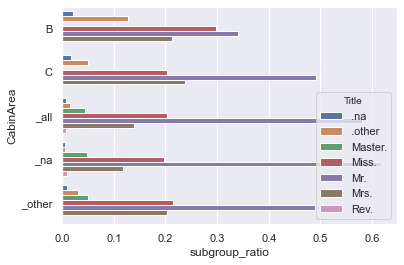

In [6]:
avc_grouped.get_plot(normalize=True) # normalize = True is default value

To get a DataFrame without the summary_statistics such as `'_all'` and `'_total'`:

In [7]:
avc_grouped.unsummerized_df

subgroup_ratio  count  r_vs_total
CabinArea Title                                     
B         Miss.             0.298     14       0.016
          Mr.               0.340     16       0.018
          Mrs.              0.213     10       0.011
          _na               0.021      1       0.001
          _other            0.127      6       0.007
C         Miss.             0.203     12       0.013
          Mr.               0.492     29       0.033
          Mrs.              0.237     14       0.016
          _na               0.017      1       0.001
          _other            0.051      3       0.003
_na       Master.           0.048     33       0.037
          Miss.             0.197    135       0.152
          Mr.               0.617    424       0.476
          Mrs.              0.118     81       0.091
          Rev.              0.009      6       0.007
          _na               0.006      4       0.004
          _other            0.006      4       0.004
_other    Master.           0.051      5       0.006
          Miss.             0.214     21       0.024
          Mr.               0.490     48       0.054
          Mrs.              0.204     20       0.022
          _na               0.010      1       0.001
          _other            0.031      3       0.003